#Performing SVM in forestfiers data


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df=pd.read_csv("forestfires.csv")
df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

#Some of the column values are almost 0 so if we can then remove this by the below code.

In [ ]:
#df.drop(df.columns[10:30],axis=1,inplace=True)

#Basic EDA

In [ ]:
df.isnull().sum()


month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
df.describe()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape


(517, 31)

array([[<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>],
       [<Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>, <Axes: >]], dtype=object)

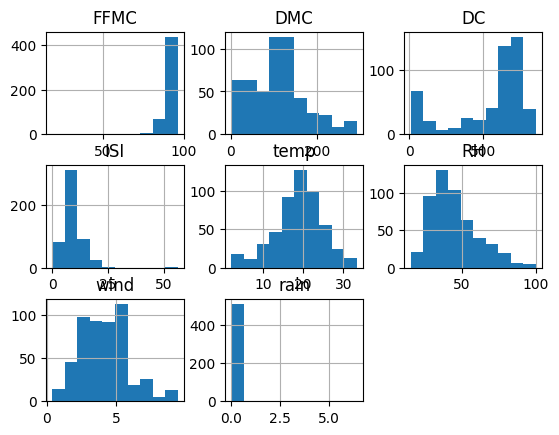

In [ ]:
df.hist(df.columns[0:10])


from  10 column to 29th column no imp data so we can put it out from the histogrom

<Axes: >

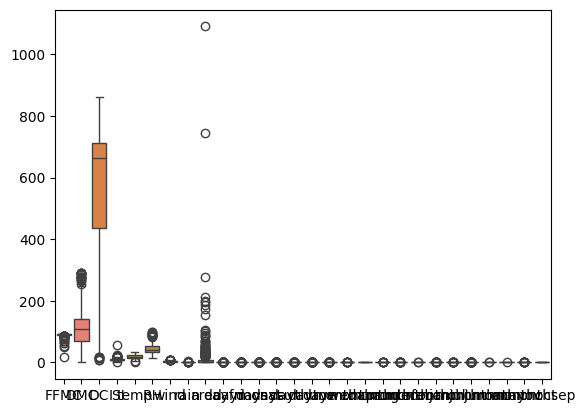

In [ ]:
sns.boxplot(df)


# we have very nominl outliers are there we are keeping this for our model betterment


<Axes: >

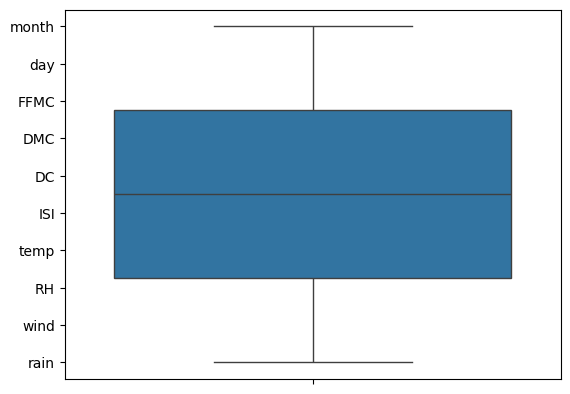

In [ ]:
sns.boxplot(df.columns[0:10])

In [ ]:

X= df.iloc[:,2:30]
Y=df.iloc[:,-1]


In [ ]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FFMC      517 non-null    float64
 1   DMC       517 non-null    float64
 2   DC        517 non-null    float64
 3   ISI       517 non-null    float64
 4   temp      517 non-null    float64
 5   RH        517 non-null    int64  
 6   wind      517 non-null    float64
 7   rain      517 non-null    float64
 8   area      517 non-null    float64
 9   dayfri    517 non-null    int64  
 10  daymon    517 non-null    int64  
 11  daysat    517 non-null    int64  
 12  daysun    517 non-null    int64  
 13  daythu    517 non-null    int64  
 14  daytue    517 non-null    int64  
 15  daywed    517 non-null    int64  
 16  monthapr  517 non-null    int64  
 17  monthaug  517 non-null    int64  
 18  monthdec  517 non-null    int64  
 19  monthfeb  517 non-null    int64  
 20  monthjan  517 non-null    int64 

In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X= SS.fit_transform(X)


<Axes: >

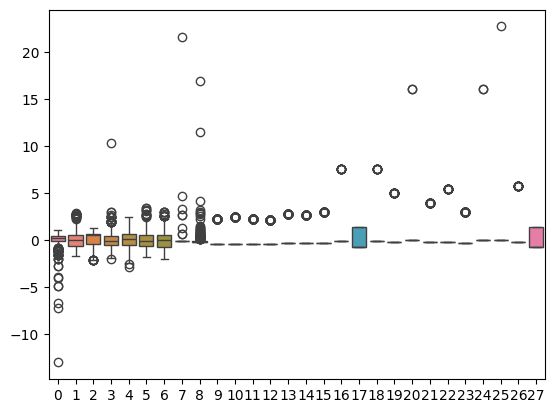

In [ ]:
sns.boxplot(SS_X)


In [ ]:
#Lebelencoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y_1=le.fit_transform(Y)
Y_1


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [ ]:

# Splitting Train and Test
from sklearn.model_selection._split import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(SS_X,Y_1,test_size=0.25,random_state=10)


In [ ]:
#applying svm  with linear function in thw model======================================================================

from  sklearn.svm import  SVC
clf=SVC(kernel='linear',C= 2)

clf.fit(X_train, Y_train)

Y_pred_train= clf.predict(X_train)
Y_pred_test= clf.predict(X_test)

from sklearn.metrics import accuracy_score

from sklearn import metrics
print("Training Accuracy :",metrics.accuracy_score(Y_train, Y_pred_train).round(2))
print("Testing Accuracy:",metrics.accuracy_score(Y_test, Y_pred_test).round(2))


Training Accuracy : 0.94
Testing Accuracy: 0.95


In [ ]:
#applying svm  with polynomial function in thw model=======================================================================

from  sklearn.svm import  SVC
clf=SVC(kernel='poly', degree=2)

clf.fit(X_train, Y_train)

Y_pred_train= clf.predict(X_train)
Y_pred_test= clf.predict(X_test)

from sklearn.metrics import accuracy_score

from sklearn import metrics
print("Training Accuracy :",metrics.accuracy_score(Y_train, Y_pred_train).round(2))
print("Testing Accuracy:",metrics.accuracy_score(Y_test, Y_pred_test).round(2))



Training Accuracy : 0.78
Testing Accuracy: 0.73


In [ ]:

#applying svm  with rbf function in thw model=======================================================================

from  sklearn.svm import  SVC
clf=SVC(kernel='rbf',gamma= 2)

clf.fit(X_train, Y_train)

Y_pred_train= clf.predict(X_train)
Y_pred_test= clf.predict(X_test)

from sklearn.metrics import accuracy_score

from sklearn import metrics
print("Training Accuracy :",metrics.accuracy_score(Y_train, Y_pred_train).round(2))
print("Testing Accuracy:",metrics.accuracy_score(Y_test, Y_pred_test).round(2))


Training Accuracy : 0.95
Testing Accuracy: 0.72


In [ ]:
#hyperperemeter tuning with grid searchcv==============================================================================================================================================


from sklearn.model_selection import GridSearchCV
from  sklearn.svm import  SVC
clf=SVC()
parameters= {'kernel':['linear','poly','rbf'], 'C':[1,2,3,6],'degree':[2,3,7]}
grid_search=GridSearchCV(clf,parameters,cv=100)

grid_search.fit(X_train,Y_train)

print('Best parameter',grid_search.best_params_)
print("best score:", grid_search.best_score_)

clf=grid_search.best_estimator_
clf.fit(X_train,Y_train)

Y_pred= clf.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix

print('confusion metrix:', confusion_matrix(Y_test,Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))


Best parameter {'C': 6, 'degree': 2, 'kernel': 'linear'}
best score: 0.9583333333333333
confusion metrix: [[32  5]
 [ 1 92]]
Accuracy: 0.9538461538461539
